In [1]:
import tensorflow as tf

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-08-01 07:48:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.5MB/s    in 3.3s    

2025-08-01 07:48:53 (31.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os
for  dirpath,dirnames,filnames in os.walk('pizzza_steak'):
  print(f'There are {len(dirnames)}directories and {len(filenames)} images in {dirpath}.')

In [6]:
for i in os.walk('pizza_steak'):
  print(i)

('pizza_steak', ['train', 'test'], [])
('pizza_steak/train', ['pizza', 'steak'], [])
('pizza_steak/train/pizza', [], ['3845083.jpg', '3629996.jpg', '884986.jpg', '369017.jpg', '2190018.jpg', '132554.jpg', '1544197.jpg', '1898723.jpg', '2557340.jpg', '1110966.jpg', '3873326.jpg', '2671508.jpg', '2739100.jpg', '717350.jpg', '3493457.jpg', '3557127.jpg', '1881674.jpg', '1370319.jpg', '1425089.jpg', '2019441.jpg', '3589437.jpg', '134462.jpg', '2844278.jpg', '2412970.jpg', '2508157.jpg', '1137400.jpg', '709273.jpg', '1044524.jpg', '918506.jpg', '816577.jpg', '395034.jpg', '2154394.jpg', '1686908.jpg', '2755875.jpg', '23199.jpg', '2137341.jpg', '337272.jpg', '3712344.jpg', '1038357.jpg', '1173913.jpg', '929067.jpg', '302591.jpg', '596494.jpg', '2723529.jpg', '1247645.jpg', '652004.jpg', '1285298.jpg', '3401720.jpg', '3109486.jpg', '350358.jpg', '2215531.jpg', '163039.jpg', '2161241.jpg', '1951130.jpg', '3803596.jpg', '2821048.jpg', '2664219.jpg', '2224099.jpg', '1958364.jpg', '857888.jpg', '

In [7]:
os.listdir('pizza_steak/train/steak')

['1241193.jpg',
 '1563266.jpg',
 '482022.jpg',
 '3223601.jpg',
 '996684.jpg',
 '660900.jpg',
 '2271133.jpg',
 '1752330.jpg',
 '1163977.jpg',
 '3260624.jpg',
 '982988.jpg',
 '3381560.jpg',
 '945791.jpg',
 '1404770.jpg',
 '56409.jpg',
 '937133.jpg',
 '513129.jpg',
 '1869467.jpg',
 '2568848.jpg',
 '3538682.jpg',
 '3438319.jpg',
 '3074367.jpg',
 '368170.jpg',
 '270687.jpg',
 '910672.jpg',
 '3173444.jpg',
 '3128952.jpg',
 '256592.jpg',
 '2878151.jpg',
 '1208405.jpg',
 '332557.jpg',
 '2881783.jpg',
 '1548239.jpg',
 '3280453.jpg',
 '1105280.jpg',
 '1736543.jpg',
 '3664376.jpg',
 '417368.jpg',
 '2495884.jpg',
 '3577618.jpg',
 '1829088.jpg',
 '763690.jpg',
 '510757.jpg',
 '1697339.jpg',
 '3322909.jpg',
 '2548974.jpg',
 '762210.jpg',
 '127029.jpg',
 '183995.jpg',
 '3855584.jpg',
 '42125.jpg',
 '421476.jpg',
 '838344.jpg',
 '1772039.jpg',
 '3553911.jpg',
 '786409.jpg',
 '2983260.jpg',
 '1870942.jpg',
 '1618011.jpg',
 '2691461.jpg',
 '167069.jpg',
 '2344227.jpg',
 '1828969.jpg',
 '1995118.jpg',
 '

In [8]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [9]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [10]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [11]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class      #'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 384, 3)


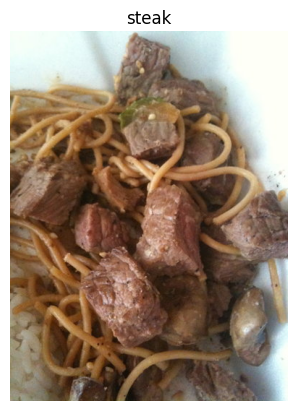

In [13]:
img = view_random_image(target_dir='pizza_steak/train/',target_class='steak')

In [14]:
img/255

array([[[0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        ...,
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745]],

       [[0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        ...,
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745]],

       [[0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        [0.96078431, 1.        , 0.96862745],
        ...,
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745],
        [0.99607843, 1.        , 0.96862745]],

       ...,

       [[0.64313725, 0.61568627, 0.50588235],
        [0.62745098, 0.6       , 0.49019608],
        [0.60392157, 0

# Fitting Model

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

In [16]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [19]:
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.5904 - loss: 0.7035 - val_accuracy: 0.8360 - val_loss: 0.4219
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.7937 - loss: 0.4656 - val_accuracy: 0.8420 - val_loss: 0.3823
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.8019 - loss: 0.4354 - val_accuracy: 0.8620 - val_loss: 0.3452
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.8307 - loss: 0.4121 - val_accuracy: 0.8260 - val_loss: 0.3942
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8166 - loss: 0.4003 - val_accuracy: 0.8620 - val_loss: 0.3240


In [20]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.5009 - loss: 0.7346 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.4934 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [23]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.5504 - loss: 7.6895 - val_accuracy: 0.6620 - val_loss: 1.4233
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.6515 - loss: 1.5978 - val_accuracy: 0.7960 - val_loss: 0.5578
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7064 - loss: 0.6934 - val_accuracy: 0.7540 - val_loss: 0.5414
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.7884 - loss: 0.4727 - val_accuracy: 0.7700 - val_loss: 0.4573
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7955 - loss: 0.4574 - val_accuracy: 0.7660 - val_loss: 0.4707


In [25]:
len(train_data)

47

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


array([[[ 59,  61,  47],
        [ 58,  60,  46],
        [ 57,  59,  46],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       [[ 55,  57,  43],
        [ 55,  57,  43],
        [ 54,  56,  43],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       [[ 53,  55,  42],
        [ 52,  54,  41],
        [ 52,  54,  41],
        ...,
        [247, 252, 246],
        [247, 252, 246],
        [247, 252, 246]],

       ...,

       [[ 69,  81,  67],
        [ 67,  79,  65],
        [ 64,  76,  62],
        ...,
        [159, 237, 250],
        [162, 238, 251],
        [165, 241, 254]],

       [[ 68,  80,  68],
        [ 68,  80,  66],
        [ 66,  78,  64],
        ...,
        [157, 235, 248],
        [160, 238, 250],
        [164, 242, 254]],

       [[ 68,  80,  68],
        [ 68,  80,  68],
        [ 67,  79,  65],
        ...,
        [155, 233, 246],
        [159, 237, 249],
        [163, 241, 253]]], dtype=uint8)
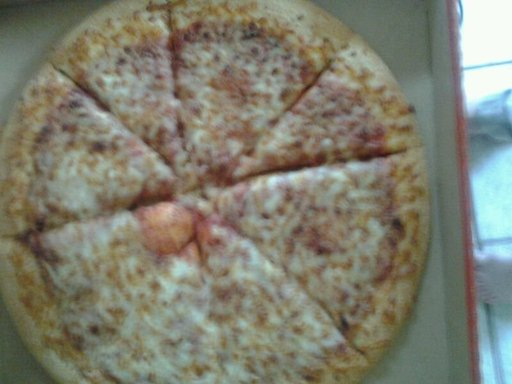

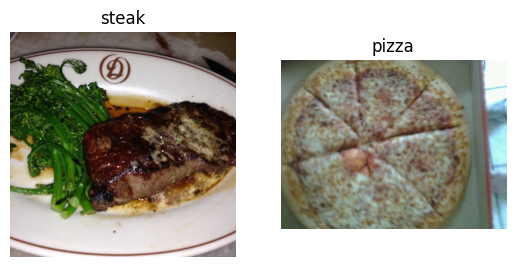

In [26]:
plt.figure()
plt.subplot(1,2,1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/', 'pizza')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1//255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(directory=valid_dir,
                                             batch_size=32,
                                             target_size =(224,224),
                                             class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
images, labels = next(train_data)

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
tf.keras.backend.clear_session()

In [31]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu',),
     MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [32]:
optimizer = Adam(learning_rate=1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [33]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5057 - loss: 7.1078 - val_accuracy: 0.6420 - val_loss: 0.6896
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.6329 - loss: 1.5112 - val_accuracy: 0.5180 - val_loss: 0.6916
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.6239 - loss: 1.0424 - val_accuracy: 0.5080 - val_loss: 0.6915
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6279 - loss: 0.8514 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.6778 - loss: 0.7088 - val_accuracy: 0.5000 - val_loss: 0.6925


In [34]:
model_1.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6675 - loss: 99.5117 


[93.9534683227539, 0.699999988079071]

In [35]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6255 - loss: 0.8020


[0.7834594249725342, 0.6460000276565552]

<Axes: >

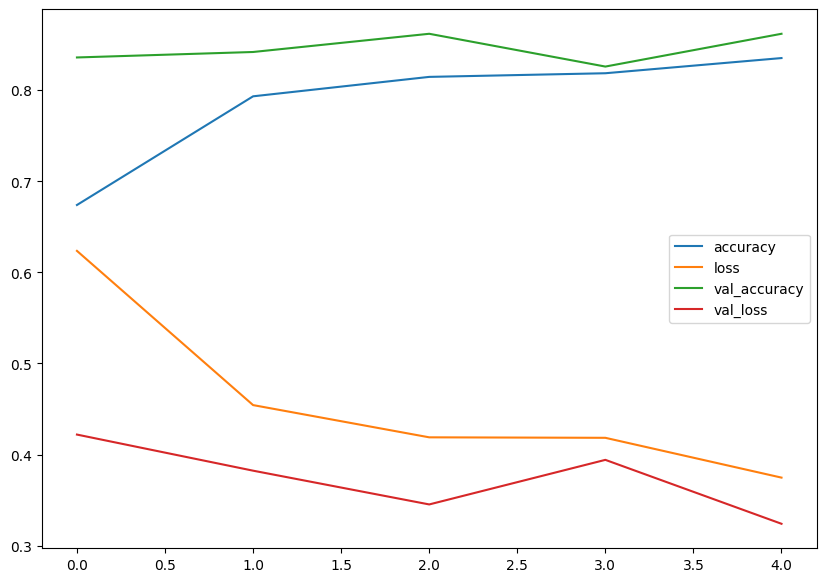

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7))

In [37]:
history_4.history

{'accuracy': [0.5460000038146973,
  0.6173333525657654,
  0.6320000290870667,
  0.6386666893959045,
  0.6626666784286499],
 'loss': [4.153753280639648,
  1.3754864931106567,
  0.9841188788414001,
  0.8276060223579407,
  0.7362679243087769],
 'val_accuracy': [0.6420000195503235,
  0.5180000066757202,
  0.5080000162124634,
  0.5,
  0.5],
 'val_loss': [0.6895725131034851,
  0.6916229128837585,
  0.6915147304534912,
  0.6921427845954895,
  0.6924993991851807]}

In [38]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  # Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

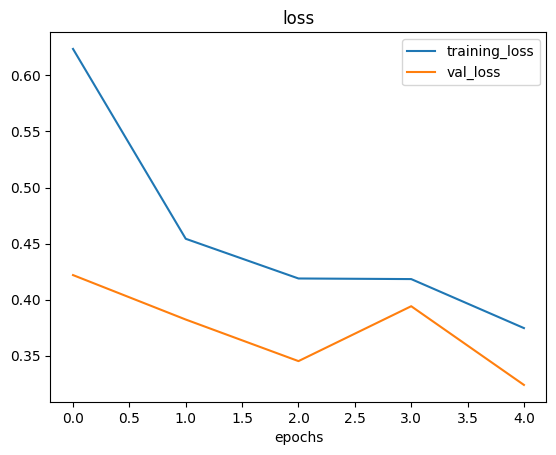

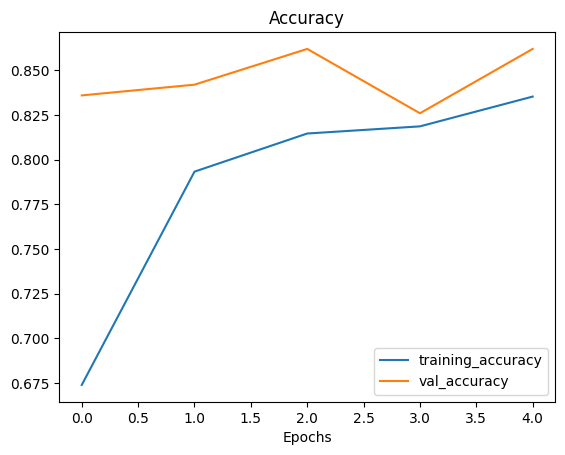

In [39]:
plot_loss_curves(history)

# Data Augmentation

In [40]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)
# Normal Dataset

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   batch_size = 32,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle = False)

print('Non-Augmented train data: ')
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-Augmented train data: ")
test_data = test_datagen.flow_from_directory(directory = valid_dir,
                                             batch_size = 32,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary')

Train data augmented: 
Found 1500 images belonging to 2 classes.
Non-Augmented train data: 
Found 1500 images belonging to 2 classes.
Non-Augmented train data: 
Found 500 images belonging to 2 classes.


In [42]:
images, labels = train_data.__next__()

augmented_images, augmented_labels = train_data_augmented.__next__()

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

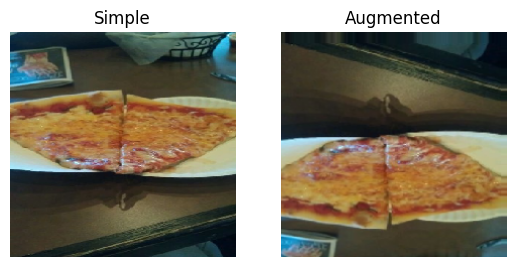

In [43]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('Off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented')
plt.axis("Off")

In [44]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=(3, 3),
                          padding='valid',
                          kernel_initializer='he_normal',
                          activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [46]:
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 547ms/step - accuracy: 0.4909 - loss: 1.0226 - val_accuracy: 0.5000 - val_loss: 0.7168
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 540ms/step - accuracy: 0.4424 - loss: 0.7449 - val_accuracy: 0.6520 - val_loss: 0.6369
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 507ms/step - accuracy: 0.5998 - loss: 0.6582 - val_accuracy: 0.5720 - val_loss: 0.6384
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 520ms/step - accuracy: 0.5114 - loss: 0.7158 - val_accuracy: 0.6560 - val_loss: 0.5857
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 522ms/step - accuracy: 0.6946 - loss: 0.6513 - val_accuracy: 0.6740 - val_loss: 0.5673


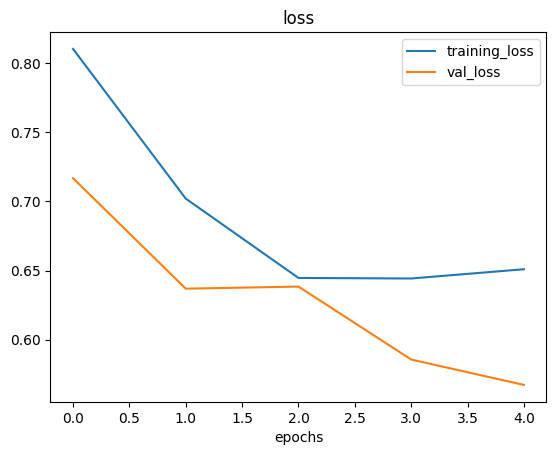

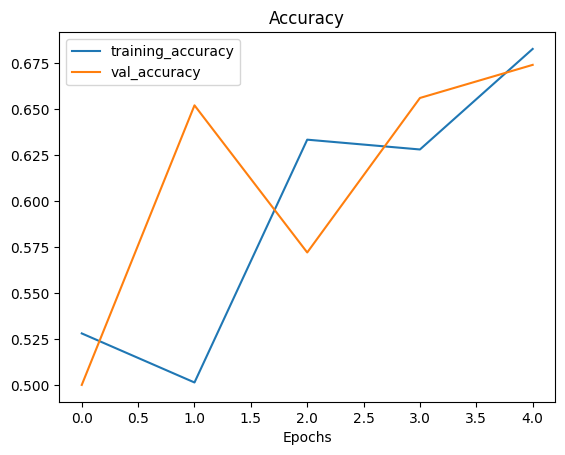

In [47]:
plot_loss_curves(history_5)

In [48]:
# Now let's Shuffle data

In [49]:
print('Augmented and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                             batch_size = 32,
                                                                             target_size = IMG_SIZE,
                                                                             class_mode = 'binary')

Augmented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [50]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [52]:
history_6 = model_6.fit(train_data_augmented_and_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_and_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 552ms/step - accuracy: 0.5254 - loss: 0.7789 - val_accuracy: 0.7180 - val_loss: 0.5946
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.6946 - loss: 0.6113 - val_accuracy: 0.7780 - val_loss: 0.4972
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 509ms/step - accuracy: 0.7256 - loss: 0.5312 - val_accuracy: 0.7660 - val_loss: 0.4662
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 511ms/step - accuracy: 0.7555 - loss: 0.5137 - val_accuracy: 0.8320 - val_loss: 0.3805
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 496ms/step - accuracy: 0.7884 - loss: 0.4693 - val_accuracy: 0.8400 - val_loss: 0.3573


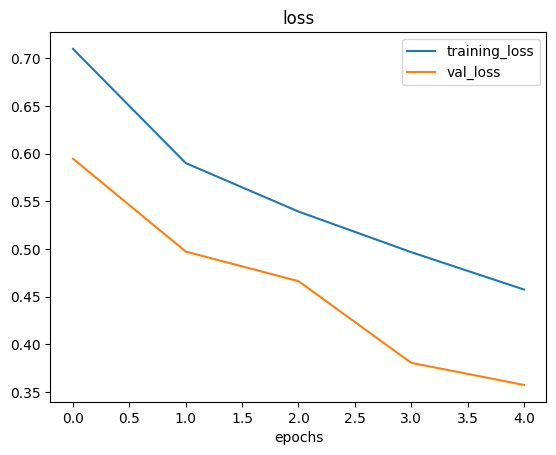

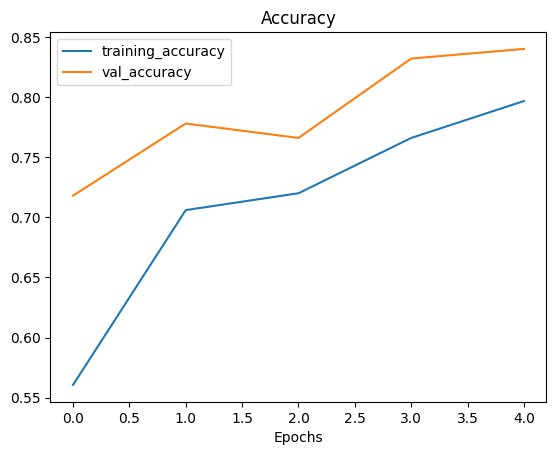

In [53]:
plot_loss_curves(history_6)

In [54]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2025-08-01 07:59:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2025-08-01 07:59:29 (61.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



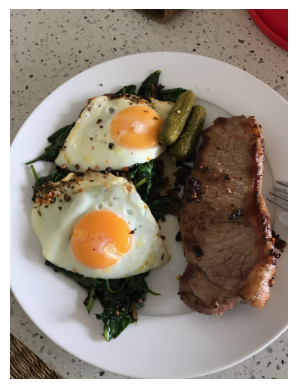

In [55]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [56]:
steak_norm = ImageDataGenerator(rescale= 1/255.)

In [57]:
steak.shape

(4032, 3024, 3)

In [58]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [59]:
(load_and_prep_image('/content/03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [60]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_6.predict(tf.expand_dims(steak, axis=0)).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


In [61]:
pred

array([[1.]], dtype=float32)

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [64]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[tf.argmax(pred, axis=1)[0]]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


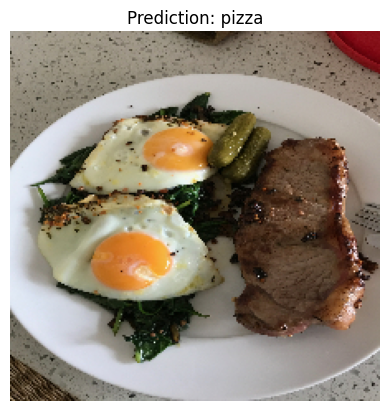

In [65]:
pred_and_plot(model_6, '03-steak.jpeg')

In [66]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2025-08-01 07:59:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2025-08-01 07:59:58 (87.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


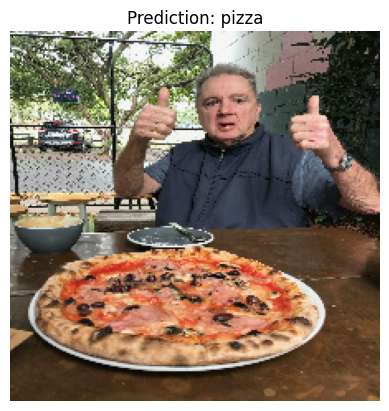

In [67]:
pred_and_plot(model_6, '/content/03-pizza-dad.jpeg')

# 10 Food Classes

In [68]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

--2025-08-01 08:00:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  37.0MB/s    in 14s     

2025-08-01 08:00:20 (34.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_da

In [69]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.2,
                                                shear_range=0.2,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [71]:
IMG_SIZE=(224, 224)
batch_size=32

In [72]:
augmented_train = train_datagen_augmentation.flow_from_directory(directory = train_dir,
                                                                 target_size=IMG_SIZE,
                                                                 class_mode='categorical',
                                                                 batch_size=batch_size)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             batch_size=batch_size)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [73]:
images, labels = next(augmented_train)

In [74]:
images.shape

(32, 224, 224, 3)

In [75]:
labels.shape

(32, 10)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

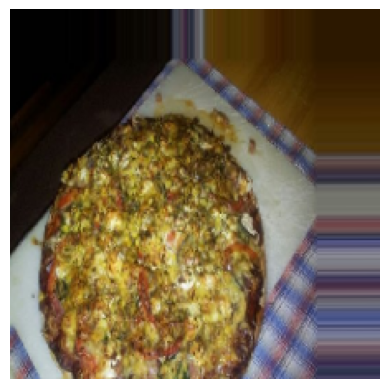

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(images[np.random.randint(len(images))])
plt.axis(False)

In [77]:
import tensorflow as tf

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Conv2D(filters=10,
    #                        kernel_size=(3, 3),
    #                        padding='valid',
    #                        activation='relu',
    #                        kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_7.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [79]:
images.shape

(32, 224, 224, 3)

In [80]:
tf.expand_dims(labels, axis=0)

<tf.Tensor: shape=(1, 32, 10), dtype=float32, numpy=
array([[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [81]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [82]:
history_7 = model_7.fit(augmented_train, epochs=5,
                        steps_per_epoch=len(augmented_train),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=(checkpoint_cb, early_stopping_cb))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 491ms/step - accuracy: 0.1322 - loss: 3.0124 - val_accuracy: 0.2728 - val_loss: 2.0713
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 453ms/step - accuracy: 0.2492 - loss: 2.1303 - val_accuracy: 0.3248 - val_loss: 1.9434
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 481ms/step - accuracy: 0.2697 - loss: 2.0529 - val_accuracy: 0.3568 - val_loss: 1.8485
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 499ms/step - accuracy: 0.2988 - loss: 1.9948 - val_accuracy: 0.3356 - val_loss: 1.9197
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 469ms/step - accuracy: 0.3141 - loss: 1.9626 - val_accuracy: 0.3668 - val_loss: 1.8158


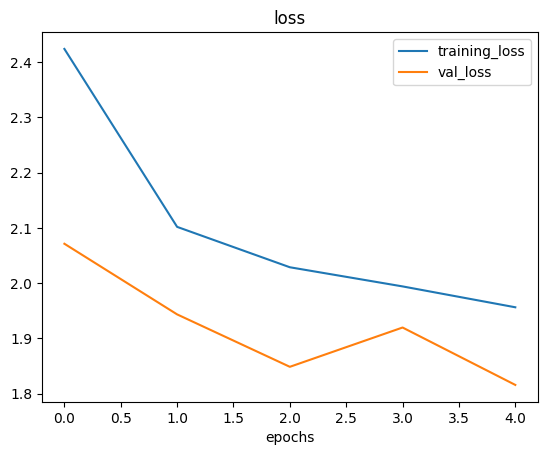

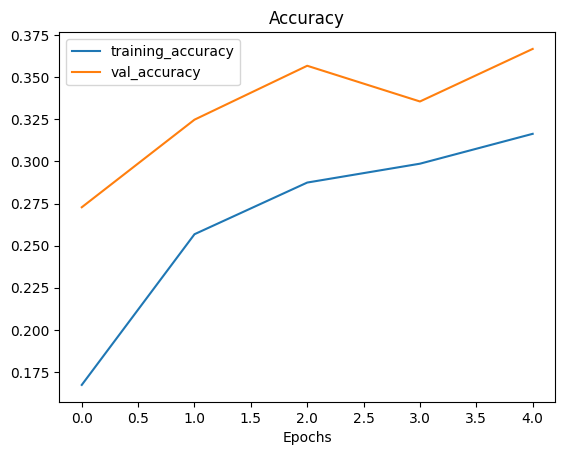

In [83]:
plot_loss_curves(history_7)

In [84]:
!wget https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg

--2025-08-01 08:15:55--  https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg
Resolving thekittchen.com (thekittchen.com)... 104.18.37.69, 172.64.150.187, 2606:4700:4400::ac40:96bb, ...
Connecting to thekittchen.com (thekittchen.com)|104.18.37.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343936 (336K) [image/jpeg]
Saving to: ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg’

PRE-Brand-Steak-and 100%[===================>] 335.88K  --.-KB/s    in 0.09s   

2025-08-01 08:15:56 (3.78 MB/s) - ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg’ saved [343936/343936]



In [88]:
pred_and_plot(model_7, '/content/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


IndexError: index 8 is out of bounds for axis 0 with size 2

# **Another Version of 10 Food classes**

In [89]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (384, 512, 3)


array([[[196, 178, 164],
        [194, 176, 162],
        [194, 176, 162],
        ...,
        [164, 139, 119],
        [160, 134, 117],
        [158, 132, 115]],

       [[192, 174, 160],
        [191, 173, 159],
        [192, 174, 160],
        ...,
        [166, 141, 121],
        [162, 136, 119],
        [158, 132, 115]],

       [[193, 175, 161],
        [194, 176, 162],
        [197, 179, 165],
        ...,
        [168, 143, 121],
        [165, 140, 120],
        [158, 133, 113]],

       ...,

       [[185, 164, 147],
        [184, 163, 146],
        [185, 164, 147],
        ...,
        [105,  79,  54],
        [106,  80,  55],
        [108,  82,  57]],

       [[187, 168, 151],
        [190, 171, 154],
        [190, 171, 154],
        ...,
        [106,  80,  55],
        [105,  79,  54],
        [102,  78,  52]],

       [[179, 160, 143],
        [185, 166, 149],
        [188, 169, 152],
        ...,
        [111,  85,  60],
        [106,  82,  56],
        [101,  77,  51]]], dtype=uint8)
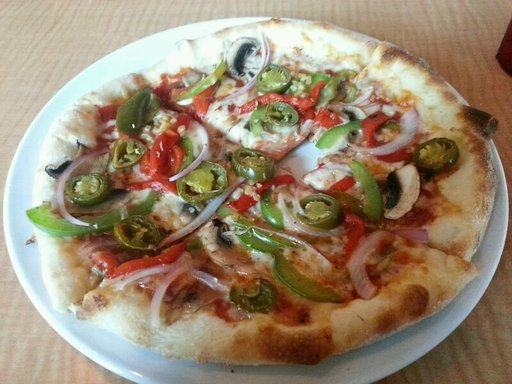

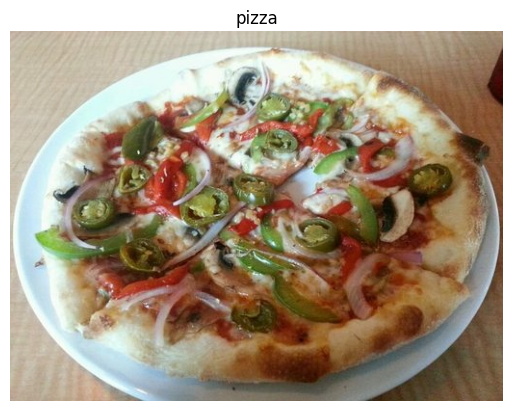

In [90]:
import random
view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = test_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [92]:
model_1_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [93]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [94]:
model_1_categorical.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.1612 - loss: 2.3987 - val_accuracy: 0.2816 - val_loss: 1.9944
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.4274 - loss: 1.7009 - val_accuracy: 0.3016 - val_loss: 1.9759
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.7383 - loss: 0.8956 - val_accuracy: 0.2868 - val_loss: 2.4333
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.9406 - loss: 0.2385 - val_accuracy: 0.2700 - val_loss: 3.0775
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.9902 - loss: 0.0673 - val_accuracy: 0.2544 - val_loss: 3.9909


In [95]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
cp = ModelCheckpoint('MyCheckpoint.weights.h5', save_weights_only=True)
es = EarlyStopping(restore_best_weights=True,
                   patience=1,
                   monitor='loss',
                   #mode = 'min'
                   )

In [96]:
model_1_categorical_history = model_1_categorical.fit(train_data,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data),
                                                      validation_steps=len(test_data),
                                                      callbacks=[es, cp])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9905 - loss: 0.0460
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9967 - loss: 0.0237
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9902 - loss: 0.0347


In [97]:
model_1_categorical_history.history

{'accuracy': [0.9868000149726868, 0.9953333139419556, 0.990933358669281],
 'loss': [0.05651155114173889, 0.025495823472738266, 0.03642282634973526]}

In [98]:
model_2_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2),
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [99]:
optimizer =  tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [100]:
model_2_categorical_history = model_2_categorical.fit(train_data,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data),
                                                      validation_data=test_data,
                                                      validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.1064 - loss: 3.6190 - val_accuracy: 0.1428 - val_loss: 2.2703
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.1397 - loss: 2.3262 - val_accuracy: 0.1864 - val_loss: 2.2242
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.1708 - loss: 2.2411 - val_accuracy: 0.2276 - val_loss: 2.1492
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.1985 - loss: 2.1776 - val_accuracy: 0.2592 - val_loss: 2.0880
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.2325 - loss: 2.1182 - val_accuracy: 0.2996 - val_loss: 2.0108


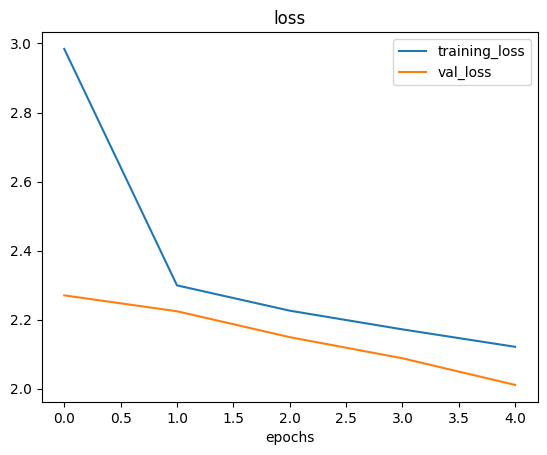

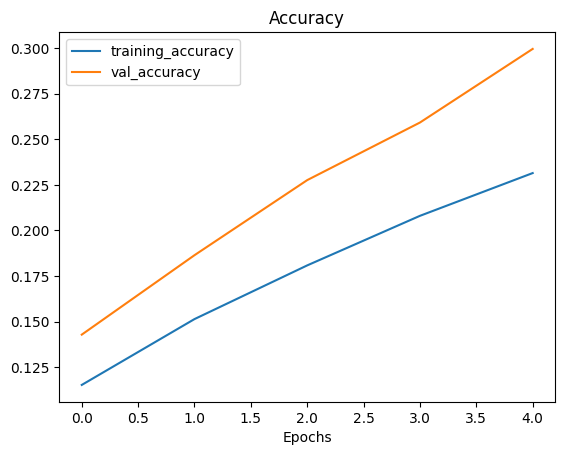

In [101]:
plot_loss_curves(model_2_categorical_history)

In [102]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [103]:
model_2_categorical_history =model_2_categorical.fit(train_data,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data),
                                                      validation_data=test_data,
                                                      validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - accuracy: 0.2540 - loss: 2.0754 - val_accuracy: 0.2756 - val_loss: 2.0193
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - accuracy: 0.2703 - loss: 2.0439 - val_accuracy: 0.3212 - val_loss: 1.9349
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.2748 - loss: 2.0137 - val_accuracy: 0.3260 - val_loss: 1.9282
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.2966 - loss: 1.9838 - val_accuracy: 0.3284 - val_loss: 1.8993
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.3176 - loss: 1.9354 - val_accuracy: 0.3588 - val_loss: 1.8579


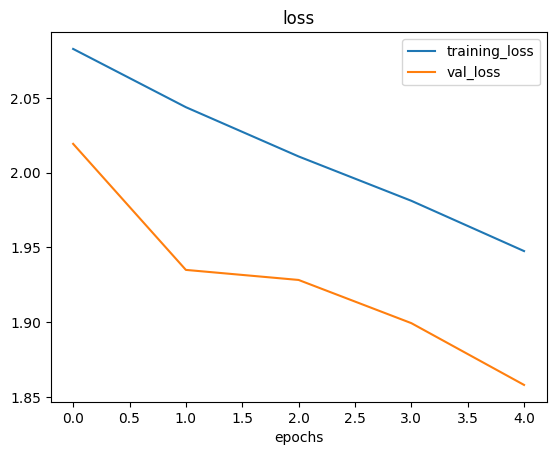

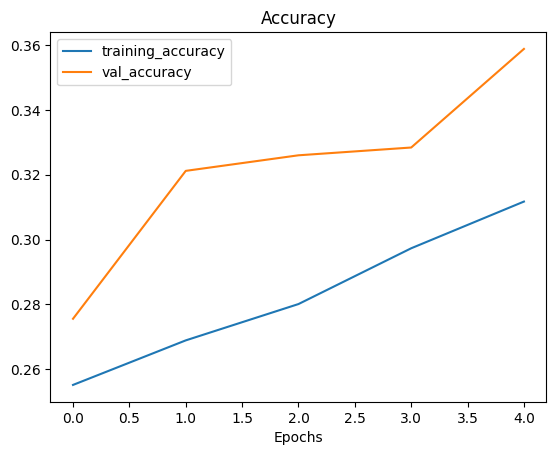

In [104]:
plot_loss_curves(model_2_categorical_history)

In [105]:
model_2_categorical.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.3669 - loss: 1.8456


[1.8579456806182861, 0.3587999939918518]

In [106]:
model_2_copy = tf.keras.models.clone_model(model_2_categorical)

In [107]:
model_2_copy.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 111, 111, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 10)   │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 55, 55, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 27, 27, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,040 (15.78 KB)

 Trainable params: 3,980 (15.55 KB)

 Non-trainable params: 60 (240.00 B)

In [108]:
train_augmented_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [109]:
train_data_augmented = train_augmented_datagen.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [110]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_copy.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [111]:
model_2_copy_history = model_2_copy.fit(train_data_augmented,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 464ms/step - accuracy: 0.1088 - loss: 3.7297 - val_accuracy: 0.1212 - val_loss: 2.2966
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 471ms/step - accuracy: 0.1041 - loss: 2.3564 - val_accuracy: 0.1360 - val_loss: 2.2817
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 493ms/step - accuracy: 0.1265 - loss: 2.2992 - val_accuracy: 0.1540 - val_loss: 2.2750
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 113s 482ms/step - accuracy: 0.1323 - loss: 2.2874 - val_accuracy: 0.1844 - val_loss: 2.2446
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 455ms/step - accuracy: 0.1420 - loss: 2.2662 - val_accuracy: 0.1976 - val_loss: 2.2279


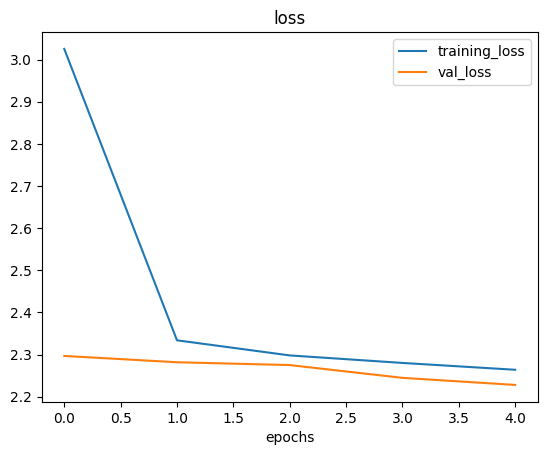

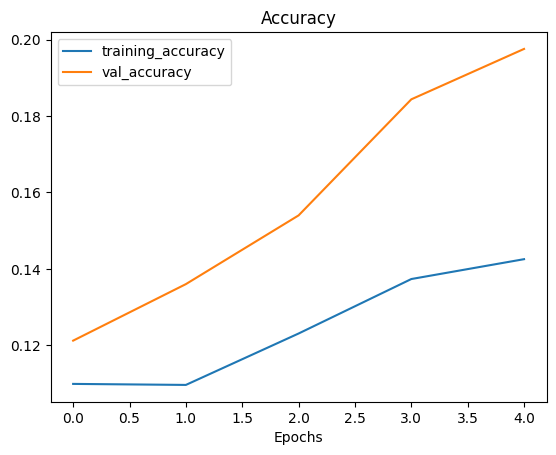

In [112]:
plot_loss_curves(model_2_copy_history)

In [113]:
# pred_and_plot for multiclass classification

def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.math.argmax(pred, axis=1)]
  else:
    pred_class = class_names[tf.int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)


In [114]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2025-08-01 08:37:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2025-08-01 08:37:17 (113 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2025-08-01 08:37:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


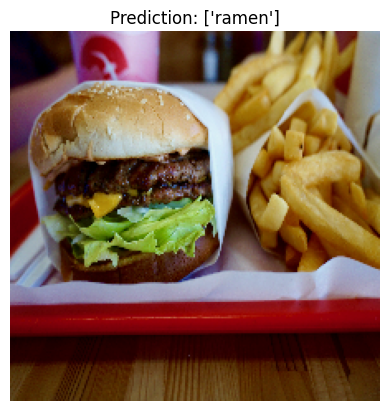

In [115]:
pred_and_plot(model = model_2_categorical,
              filename = '03-hamburger.jpeg',
              class_names = (class_names))